In [1]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics

In [3]:
#read data 
instagram_data = pd.read_csv(r'/content/drive/MyDrive/PCD/data/Instagram User Stats.csv')
#instagram_data.drop('id', axis = 1, inplace = True)
lpos=[]
lflr=[]
lflg=[]
leg=[]
ler=[]
lfg=[]
lop=[]
for i in instagram_data.index:
  if (instagram_data['id'][i]<=10000):
    lpos.append(instagram_data['pos'][i])
    lflr.append(instagram_data['flr'][i])
    lflg.append(instagram_data['flg'][i])
    leg.append(instagram_data['eg'][i])
    ler.append(instagram_data['er'][i])
    lfg.append(instagram_data['fg'][i])
    lop.append(instagram_data['op'][i])
  else:
    break    
df=pd.DataFrame({"pos":lpos,
                "flr":lflr,
                "flg":lflg,"eg":leg,"er":leg,"fg":lfg,"op":lop,}) 
scaler = StandardScaler()
instagram_data_scaled = scaler.fit_transform(df)

In [5]:
score_4 = []
range_values = range(1, 15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(instagram_data_scaled)
    score_4.append(kmeans.inertia_)

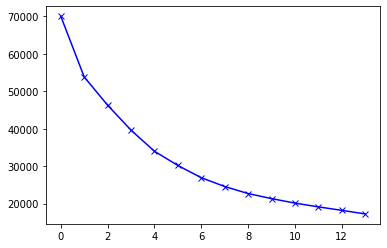

In [6]:
plt.plot(score_4, 'bx-')

In [7]:
#spectral instagram
import sklearn
spectral = SpectralClustering(n_clusters=10)
spectral.fit_predict(instagram_data_scaled)
labels_instagram = spectral.labels_
#metrics
silhouette_avg = silhouette_score(instagram_data_scaled, labels_instagram)
Davies_M= sklearn.metrics.davies_bouldin_score(instagram_data_scaled, labels_instagram)
Calinski_Harabaz=metrics.calinski_harabasz_score(instagram_data_scaled, labels_instagram)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


300.266393622917
0.04927990970081644
0.929020790615927


In [ ]:
#show data 
pca = PCA(n_components = 2)
principal_comp2 = pca.fit_transform(instagram_data_scaled)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels_instagram})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df2, palette = ['red','green'])